In [2]:
from scipy.special import binom, comb
# from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import sys
lib = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
lib2 = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
lib3 = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\classifying-response-to-immunotherapy\data_analysis'
lib4 = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\classifying-response-to-immunotherapy'
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
# from pyclustering.cluster.kmeans import kmeans
# from pyclustering.utils.metric import type_metric, distance_metric
# from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
import numpy as np
import matplotlib
from utilities.droplet_dataset import  build_cohort
import os
from os.path import join
from DL.Mars_seq_DL.data_loading import *
from utilities.droplet_dataset import *
import math
import matplotlib as plt
from sklearn.manifold import TSNE
import statsmodels as sm
import scipy.stats as stats
# from Bio.Cluster import kcluster
from sklearn.manifold import TSNE
import pickle
from scipy.stats import pearsonr
import statsmodels as sm



In [24]:
def str_list_to_float(li):
    return [int(y) for y in li]

In [ ]:
idT = pd.read_csv('ids/' + species + '_' + idType + '.csv', dtype=object, index_col=0, header=0)
commonIDs = list(set(idT.index).intersection(set(em.index)))
idT = idT.loc[commonIDs,]
em = em.loc[commonIDs,]
em.index = idT.loc[commonIDs,'Symbol']
em = em.groupby(level=0).sum()

In [54]:
species = 'd'
idType = 'd'
'ids/' + species + '_' + idType + '.csv'

'ids/d_d.csv'

In [83]:
path = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\NATMI\ids\9606_ensembl.csv'
emFile = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\outputs\NATMI\DEBUG\count_table.csv'

em = pd.read_csv(emFile, index_col=0, header=0)
em = em.loc[em.max(axis=1)>0,]
idT = pd.read_csv(path, dtype=object, index_col=0, header=0)



In [84]:
commonIDs = list(set(idT.index).intersection(set(em.index)))
print(len(commonIDs))


15052


In [90]:
commonIDs[:10]
commonIDs[-10:]

['ENSG00000113273',
 'ENSG00000105419',
 'ENSG00000167619',
 'ENSG00000218739',
 'ENSG00000225439',
 'ENSG00000159217',
 'ENSG00000117500',
 'ENSG00000168395',
 'ENSG00000101782',
 'ENSG00000140025']

In [208]:
print(len(commonIDs))
idT_1 = idT.loc[commonIDs,]
idT_1#.reset_index()
# len(idT_1)
[[g1,g2] for g1, g2 in zip(commonIDs, list(idT_1.index)) if g1!=g2]
# em = em.loc[commonIDs,]

15052


[]

In [209]:
pd.DataFrame(list(zip(commonIDs, list(idT_1.index)))).iloc[3405:3410]

,0,1
3405,ENSG00000167258,ENSG00000167258
3406,ENSG00000169760,ENSG00000169760
3407,ENSG00000230426,ENSG00000230426
3408,ENSG00000169607,ENSG00000169607
3409,ENSG00000135926,ENSG00000135926


In [156]:
[g for g in commonIDs if g.startswith('ENSG0000023042')]
commonIDs[3405:]
idT.loc['ENSG00000230426']

,Symbol
Ensembl Gene ID,
ENSG00000230426,ERVMER61-1
ENSG00000230426,LINC01036


In [212]:
def BUG_FIXED_change_idT_index(idT):
    dic_counter = {k:0 for k in set(idT.index)}
    new_index = []
    for k in np.array(idT.index):
        if dic_counter[k]==0:
            dic_counter[k]+=1 #print()
            new_index += [k]
        else:
            print(k)
            new_index += [k+'_2']
    return new_index
idT.index = BUG_FIXED_change_idT_index(idT)

In [121]:
Counter(ll2)

Counter({1: 15052})

In [74]:
# set(idT.index)

In [65]:
idT

,Ensembl Gene ID,Symbol
0,ENSG00000121410,A1BG
1,ENSG00000268895,A1BG-AS1
2,ENSG00000148584,A1CF
3,ENSG00000175899,A2M
4,ENSG00000245105,A2M-AS1
...,...,...
38550,ENSG00000162378,ZYG11B
38551,ENSG00000159840,ZYX
38552,ENSG00000274572,ZYXP1
38553,ENSG00000074755,ZZEF1


In [5]:
pkl_path = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\Data\droplet_seq\DEBUG\200_rand_cells.pkl'
cohort = pickle.load(open(pkl_path, 'rb'))
cohort.number_of_genes

32738

In [14]:
count_table = pd.DataFrame(cohort.counts.T, columns=cohort.barcodes, index=cohort.features)


In [48]:
ann_df = pd.DataFrame(transpose_list([cohort.barcodes, cohort.get_cancer_immune_stroma_map()[1]]), columns=["Cell", "Annotation"])

In [52]:
count_table.to_csv(r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\outputs\NATMI\DEBUG\count_table.csv', index=True,header=True)
ann_df.to_csv(r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\python_playground\outputs\NATMI\DEBUG\ann.csv', index=False)

In [49]:
ann_df

,Cell,Annotation
0,ACGGCCAAGGTGATAT-1,is_cancer
1,AGGCCACTCGATCCCT-1,is_cancer
2,TAGGCATTCTAGAGTC-1,is_immune
3,TCAGGATTCCTGCTTG-1,is_immune
4,AACTGGTAGGCCCGTT-1,is_cancer
...,...,...
195,AACTCTTTCTGCCCTA-1,is_cancer
196,GTACTTTCATGACGGA-1,is_cancer
197,TTCTCCTGTGGTGTAG-1,is_immune
198,AAACCTGAGGGAGTAA-1,is_immune


In [42]:
count_table

,ACGGCCAAGGTGATAT-1,AGGCCACTCGATCCCT-1,TAGGCATTCTAGAGTC-1,TCAGGATTCCTGCTTG-1,AACTGGTAGGCCCGTT-1,AGCTCTCCAGGGAGAG-1,CACAGGCAGCAGACTG-1,CCATGTCTCAAACGGG-1,CCTTTCTAGGTCATCT-1,CGCTGGAGTCAAAGCG-1,...,TTTCCTCTCTACTTAC-1,AAGGCAGGTGGCCCTA-1,ATGTGTGGTCTCTCTG-1,CAGAGAGTCGACCAGC-1,AAAGTAGGTCTGGAGA-1,AACTCTTTCTGCCCTA-1,GTACTTTCATGACGGA-1,TTCTCCTGTGGTGTAG-1,AAACCTGAGGGAGTAA-1,CGGAGTCTCGCTTAGA-1
ENSG00000000003,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.94197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000005,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000457,0.709399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000460,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273487,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273488,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273489,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000273492,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
txt_path = r'C:\Users\KerenYlab\Desktop\Technion studies\Keren laboratory\Data\droplet_seq\all_samples\M136\counts.txt'
with open(txt_path, 'r') as read_file:
    counts = read_file.readlines()
    counts = np.array([str_list_to_float(counts.split(' ')[:-1]) for counts in counts]).astype(np.uint16).T

In [27]:
counts.shape

(4872, 22840)

In [ ]:
import

In [1]:
# tumor_path = r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/5.21/cohort_normalized_24.5.21.pkl'
# COHORT_PATH = r'/storage/md_keren/shitay/Data/droplet_seq/cohort/normalized/6.21/cohort_normalized_26.6.21.pkl'
COHORT_PATH = r'/storage/md_keren/shitay/Data/droplet_seq/M97_M173/subcohort/normalized/1.1.22/subcohort_normalized_1.1.22_protein_coding_genes.pkl'

# tumor_cohort = pickle.load(open(tumor_path, 'rb'))
cohort = pickle.load(open(COHORT_PATH, 'rb'))
# tumor_cohort = cohort.filter_cells_by_property('is_cancer', True)


NameError: name 'pickle' is not defined

In [5]:
def prob(k, n, p):
    return binom(n, k)*(p**k)*(1-p)**(n-k)

In [6]:
l = []
n, p = 10, 0.5
for k in range(n+1):
    r = prob(k, n, p)
    print(r)
    l.append(r)
sum(l)


0.0009765625
0.009765625
0.0439453125
0.1171875
0.205078125
0.24609375
0.205078125
0.1171875
0.0439453125
0.009765625
0.0009765625


1.0

In [7]:
l = []
n, p = 10, 0.8
for k in range(5, 11):
    r = prob(k, n, p)
    print(r)
    l.append(r)
sum(l)

0.026424115199999976
0.08808038399999996
0.20132659199999994
0.30198988800000004
0.26843545600000007
0.10737418240000006


0.9936306176

In [8]:

# The probability that Y gets 1<=K<=10
l = []
n, p = 100, 0.8
for k in range(0, n+1):
    r = prob(k, n, p)
#     print(r)
    l.append(r)


n = 100, p=0.8


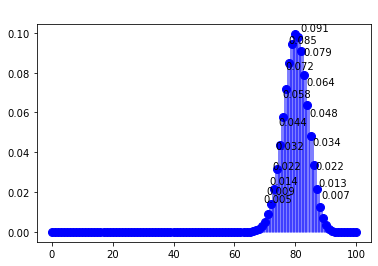

In [9]:
indexes = np.arange(len(l))
print(f'n = {n}, p={p}')
plt.plot(indexes, l, 'bo', ms=8, label='binom pmf')
plt.vlines(indexes, 0, l, colors='b', lw=5, alpha=0.5)
for i,j in zip(indexes[70:90],l[70:90]):
    plt.annotate(round(j, 3),xy=(i-0.4,j+0.01))
plt.show()

In [10]:
mean = 8



In [36]:
sum = 0
for i in range(100):
    sum += l[i]
    
    print(sum)
    print(i)
    if sum>0.5:
        break
sum

1.0239999999999978e-07
0
4.198399999999992e-06
1
7.792639999999986e-05
2
0.0008643583999999989
3
0.006369382399999993
4
0.03279349759999997
5
0.12087388159999993
6
0.32220047359999987
7
0.6241903616
8


0.6241903616

In [19]:
l[round(len(l)/2)]



1.6212613988670742e-11